# Karman-Trefftz airfoil

For the second assignment of this class, you have used the Joukowski transformation, a conformal map that shapes a cylinder into an airfoil with a cusp at the trailing edge.

Here, we are going to use another conformal map: the Karman-Trefftz transform.
This transform allows us to represent the potential flow around a class of airfoils with a non-zero tail angle at the trailing edge known as Karman-Trefftz airfoils.


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.

You will also create some figures.
Make sure they are generated with a publication-quality, that is, the presence of a title or caption, axis labels, and legend (when necessary).

For figures including a filled contour, we recommend the use of the 'viridis' colormap over the usual 'jet'; the last one is not perfectly perceptually-uniform.

In [50]:
# Import your libraries here.
import numpy
import math
from matplotlib import pyplot
#embed plots in notebook
%matplotlib inline

from scipy import integrate

---

## First part - Karman-Trefftz conformal mapping

---

### Conformal mapping

The Karman-Trefftz transformation maps a cylinder (defined in the $\xi$-plane) to an airfoil ($z$-plane) that possesses a non-zero tail angle at the trailing edge.

$$z = n \frac{\left(1 + \frac{b^2}{\xi}\right)^n + \left(1 - \frac{b^2}{\xi}\right)^n}{\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n}$$

where $n = 2 - \frac{\theta}{\pi}$, $\theta$ being the tail angle (in radians) at the trailing edge and $b$ a parameter that controls the thickness of the airfoil.

Note that when we choose a zero tail-angle, the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $\xi$-plane of the cylinder and the $z$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $\xi$-plane as an argument and returns the the comlpex coordinates in the $z$-plane.

To check your function, here is what we obtained:
the point $2.2 + 2.2j$ maps into the point $2.41874477821 + 1.98092269337j$ when using $b=1$ and $theta=5^o$.

In [2]:
# Write your conformal mapping function in this cell.
def transform(xi,b,theta):
    """
    Function that returns the Karman-Trefftz transformation
    
    Parameters
    ----------
    xi: float
        the complex variable to be mapped on the z-plane
        
    b: float
        parameter for Karman-Trefftz transformation
        
    theta:float
        tail angle at the trailing edge
        
    Returns
    ----------
    z: float
        the mapped variable
    """
    n = 2-theta/math.pi
    b2xi = b**2/xi
    z = n*((1+b2xi)**n + (1-b2xi)**n)/((1+b2xi)**n - (1-b2xi)**n)
    return z

#testing function
xi = 2.2 + 2.2*1j
b,theta = 1, 5*math.pi/180
transform(xi,b,theta)

(2.4187447782142586+1.980922693367887j)

---

### From a cylinder  to an airfoil

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b-x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points overlap.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.1$
* $b = 1.0$
* $\theta = 5^o$
* $N = 61$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure.

4- What is the index and coordinates of the trailing-edge point?

5- What is the location of the first point on the airfoil?

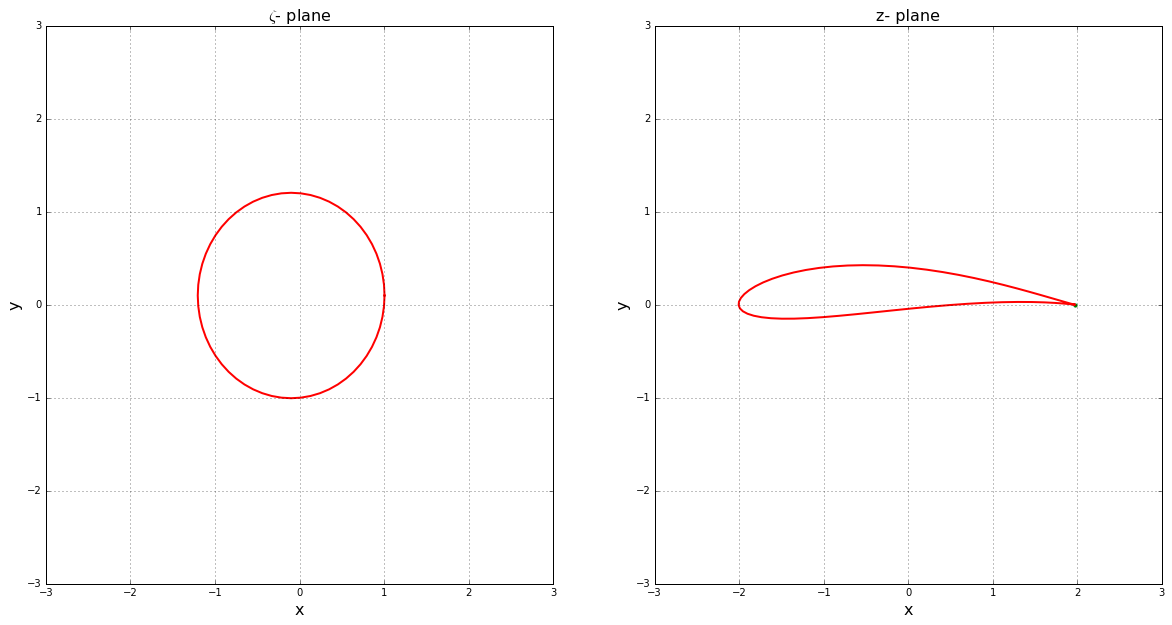

In [3]:
# Use this cell to write your code.
xc,yc = -0.1,0.1
b,theta = 1, 5*math.pi/180
N = 61
THETA = numpy.linspace(0,2*math.pi,N)
R = numpy.sqrt((b-xc)**2+yc**2)
xi = R*numpy.cos(THETA)+ xc + (R*numpy.sin(THETA)+yc)*1j
z = transform(xi,b,theta)
# plotting circle
size = 10
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.title('$\zeta$- plane',fontsize = 16)
pyplot.plot(xi.real,xi.imag, color = 'red',linewidth = 2)

# plotting Karman-Trefftz airfoil
pyplot.subplot(1,2,2)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.title('z- plane',fontsize = 16)
pyplot.plot(z.real,z.imag, color = 'red',linewidth = 2)
pyplot.scatter(z.real[59],z.imag[59], color = 'green',s = 10)

In [4]:
#index and co-ordinate of trailing edge point
x_trailing = max(z.real)
index_trailing = numpy.where(z.real == x_trailing); index_trailing = index_trailing[0];
y_trailing = z.imag[index_trailing]; y_trailing = y_trailing[0];
print("4. \tThe trailing edge is at the point    (",x_trailing,",",y_trailing,")")
print("\tThe index of the trailing edge is", index_trailing[0],"which is 1 grid point away from the first point on the airfoil" )
# The first point on the airfoil
z_first = z[0]
print("\n5.\tThe first point on the airfoil is at (",z_first.real,",",z_first.imag," )")

4. 	The trailing edge is at the point    ( 1.97195210972 , 3.63504526716e-05 )
	The index of the trailing edge is 59 which is 1 grid point away from the first point on the airfoil

5.	The first point on the airfoil is at ( 1.96186755678 , 0.00243236496677  )


---

### Mesh-grid in polar coordinates

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($\xi$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $100$ points in the radial direction ($R\leq r \leq R+5$) and $61$ points on the surface of the cylinder (from $0$ to $2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($z$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes.

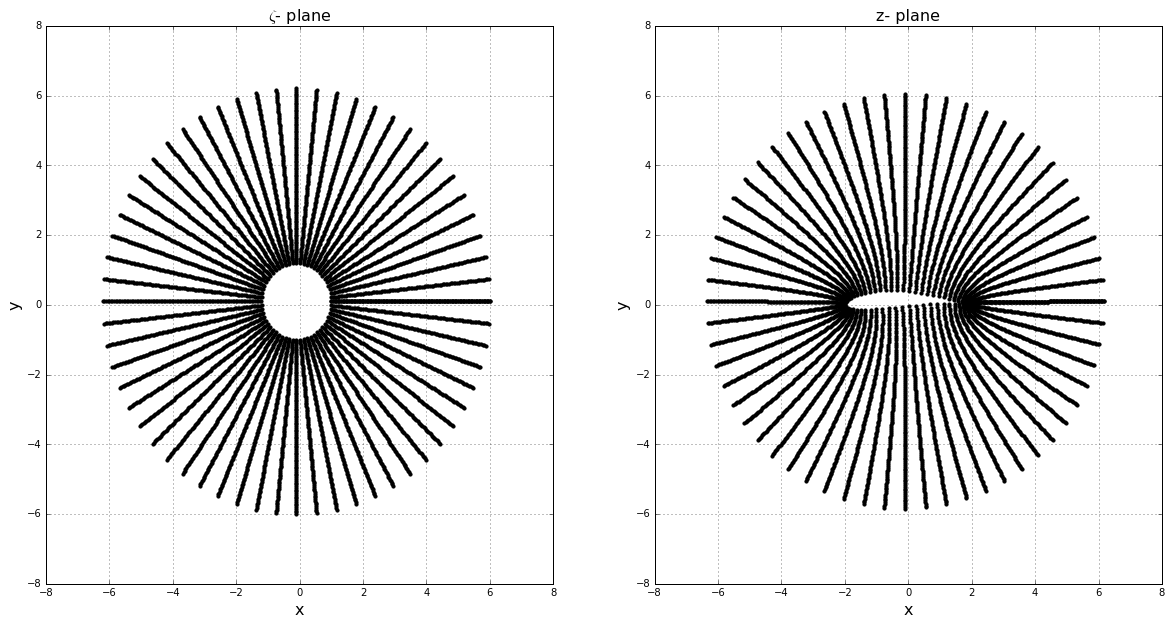

In [99]:
# Use this cell to write your code.
Nr, Ntheta = 100,61
r = numpy.linspace(R,R+5,Nr)
THETA = numpy.linspace(0,2*math.pi,N)
r1,theta1 = numpy.meshgrid(r,THETA)
xi1 = r1*numpy.cos(theta1)+ xc + (r1*numpy.sin(theta1)+yc)*1j
z1 = transform(xi1,b,theta)

#plotting circle
size = 10
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.grid(True)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.title('$\zeta$- plane',fontsize = 16)
pyplot.scatter(xi1.real,xi1.imag, color = 'k',s = 10)

#plotting Karman-Trefftz airfoil
pyplot.subplot(1,2,2)
pyplot.grid(True)
#pyplot.xlim(-3,3)
#pyplot.ylim(-3,3)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.title('z- plane',fontsize = 16)
pyplot.scatter(z1.real,z1.imag, color = 'black',s = 10)

---

### Freestream + doublet = ?

We are now going to compute the velocity field around a cylinder in the $\xi$-plane.

As we now know, the inviscid flow around a cylinder (with no circulation) can be represented by the sum of a freestream and a doublet.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^o$.

**List of tasks:**

1- What should be the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity due to a freestream on a given mesh-grid.

2(b)-Write a function that returns the streamfunction due to a freestream on a given mesh-grid.

3(a)- Write a function that returns the velocity due to a point-doublet on a given mesh-grid.

3(b)- Write a function that returns the streamfunction due to a point-doublet on a given mesh-grid.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($\xi$-plane).

5- Plot the streamlines using [`pyplot.contour`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and the velocity field using [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver).

In [6]:
# Write your functions in this cells.
def get_velocity_freestream(velocity,angle):
    """
    Function that returns free stream velocity for a meshgrid
    
    Parameters
    ----------
    velocity: float
        magnitude of velocity of the free stream
        
    angle: float
        angle of the free stream with respect to horizontal
    
    Returns
    ----------
    u: float
        x-component of freestream velocity
    
    v: float
        y-component of freestream velocity
    """
    u = velocity*numpy.cos(angle)
    v = velocity*numpy.sin(angle)
    return u,v

def get_streamfunction_freestream(u,v,X,Y):
    """
    Function that returns free stream velocity for a meshgrid
    
    Parameters
    ----------
    u: float
        x-component of the free stream velocity
        
    v:float
        y-component of the free stream velocity
        
    X: float
        x-coordinates of the meshgrid
    
    Y: float
        y-coordinates of the meshgrid
    
    Returns
    ----------
    psi: float
        the stream function of the free stream
    """
    psi = u*Y - v*X
    return psi

def get_velocity_doublet (strength,xd,yd,X,Y):
    """ 
    Returns the velocity field and stream function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/(((X-xd)**2 + (Y-yd)**2)**2)
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)**2
    return u,v

def get_streamfunction_doublet (strength,xd,yd,X,Y):
    """ 
    Returns the velocity field and stream function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function of the doublet
    """
    psi = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)
    return psi


In [7]:
# Use this cell to provide the rest of the code.

#Task 1
u_free,angle = 1,0
u_inf,v_inf = get_velocity_freestream(u_free,angle) 
psi_inf = get_streamfunction_freestream(u_inf,v_inf,xi1.real,xi1.imag)
#strength of doublet for a given radius of cylinder immersed in a free stream is
strength_doublet = 2*math.pi*u_inf*R**2
print("1.\tThe strength of the doublet is",strength_doublet)

1.	The strength of the doublet is 7.66548607476


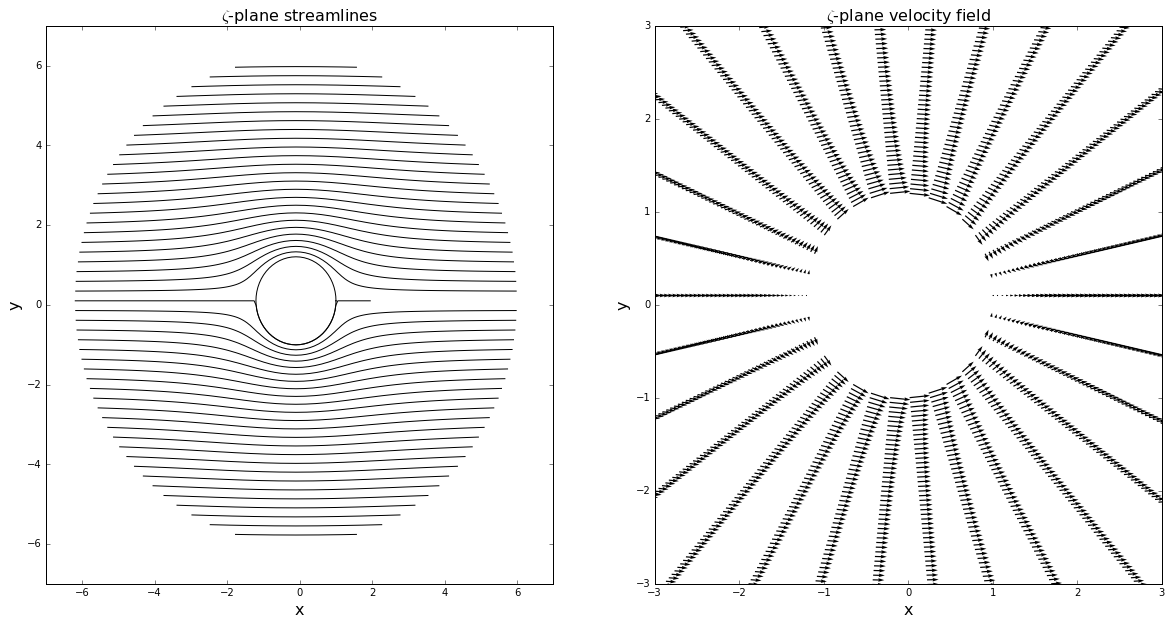

In [8]:
#Task 4
u_doublet,v_doublet = get_velocity_doublet(strength_doublet,xc,yc,xi1.real,xi1.imag)
psi_doublet = get_streamfunction_doublet(strength_doublet,xc,yc,xi1.real,xi1.imag)
U_xi,V_xi,psi_xi = u_doublet + u_inf, v_doublet + v_inf, psi_doublet + psi_inf

#plotting freestream + doublet
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.contour(xi1.real,xi1.imag,psi_xi,levels=numpy.linspace(numpy.min(psi_xi),numpy.max(psi_xi),51),colors = 'k',linestyles='solid')
pyplot.plot(xi1.real[:,0],xi1.imag[:,0],color='k')
pyplot.title('$\zeta$-plane streamlines',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)

pyplot.subplot(1,2,2)
pyplot.quiver(xi1.real[::2],xi1.imag[::2],U_xi[::2],V_xi[::2],scale_units='inches',scale = 7.0)
pyplot.title('$\zeta$-plane velocity field',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);


---

### Freestream + doublet... Is that enough?

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $z$-plane

We remember that the complex velocity in the $z$-plane is related to the complex one in the $\xi$-plane via the following formula:

$$W_z = W_\xi / \frac{dz}{d\xi}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$.

The derivative of $z$ with respect to $\xi$ is:

$$\frac{dz}{d\xi} = \frac{4n^2b^2}{\xi^2 - b^4} \frac{\left(1 + \frac{b^2}{\xi}\right)^n \left(1 - \frac{b^2}{\xi}\right)^n}{\left[\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $\xi$-plane as argument and returns the value of the derivative $\frac{dz}{d\xi}$.

To check your function, here is what we obtained:
the function on the point $2.2 + 2.2j$ returns the point $1.00022655827 + 0.0995002428218j$ when using $b=1$ and $theta=5^o$.

2- Compute the velocity on the mesh-grid in the airfoil plane ($z-plane$).

3- Plot the streamlines and the velocity field in the $z$-plane using the Matplotlib functions [`pyplot.contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver), respectively.

4- Does the streamlines at the trailing-edge look physical? Why?
(You can display a zoom at the trailing-edge to support your answer.)

In [9]:
# Use this cell to write your function.
def derivative_z_xi(xi,b,theta):
    
    n = 2-theta/math.pi
    b2xi = b**2/xi
    dzdxi = 4*n**2*b**2/(xi**2-b**4)*((1+b**2/xi)**n * (1-b**2/xi)**n)/((1+b**2/xi)**n - (1-b**2/xi)**n)**2
    return dzdxi

In [10]:
# Use this cell to provide the rest of the code.

#testing function
b,theta = 1.0, 5.0*math.pi/180
xi_test = 2.2 + 2.2*1j
derivative_z_xi(xi_test,b,theta)

(1.0002265582728562+0.09950024282184344j)

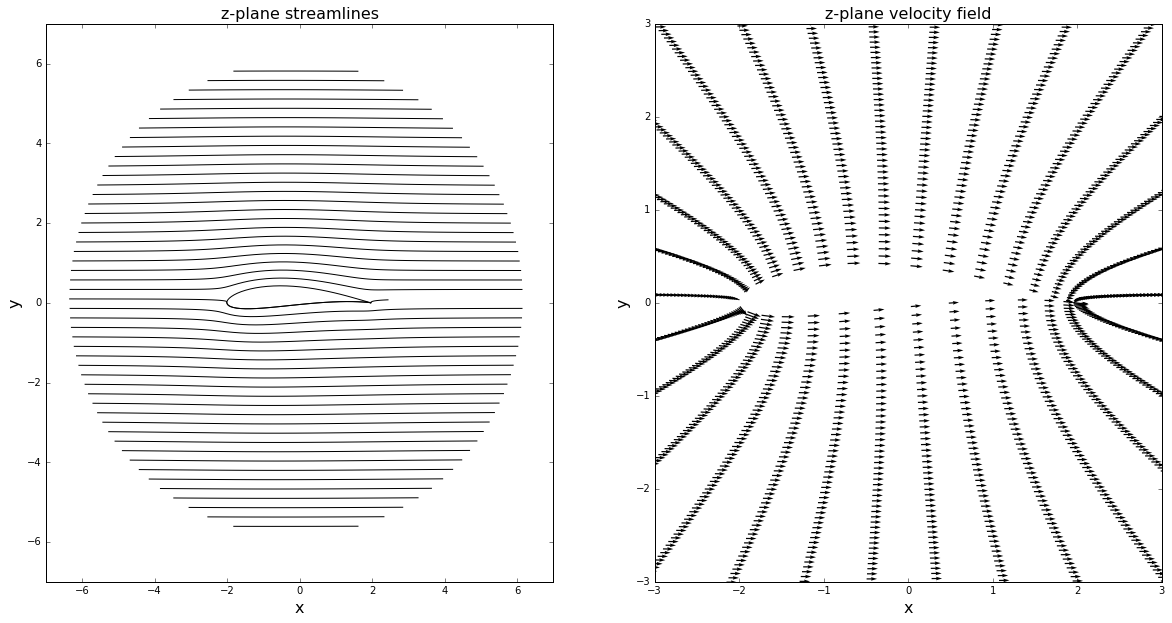

In [11]:
# velocity in the z-plane
dz = derivative_z_xi(xi1,b,theta)
z1 = transform(xi1,b,theta)
V_z = (U_xi-V_xi*1j)/dz

pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.contour(z1.real,z1.imag,psi_xi,levels=numpy.linspace(numpy.min(psi_xi),numpy.max(psi_xi),51),colors = 'k',linestyles='solid')
pyplot.plot(z1.real[:,0],z1.imag[:,0],color='k')
pyplot.title('z-plane streamlines',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-7,7);
pyplot.ylim(-7,7);

pyplot.subplot(1,2,2)
pyplot.quiver(z1.real[::2],z1.imag[::2],V_z.real[::2],-V_z.imag[::2],scale_units='inches',scale = 7.0)
pyplot.title('z-plane velocity field',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);


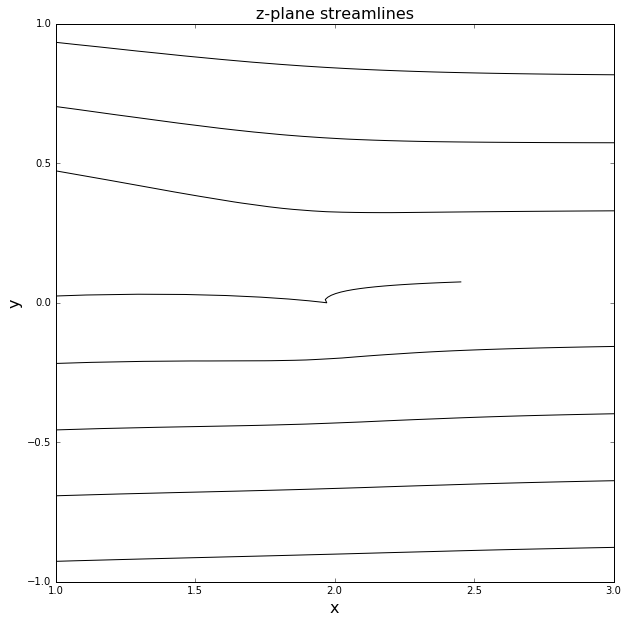

In [12]:
#Task 4
pyplot.figure(figsize=(size,size))
pyplot.contour(z1.real,z1.imag,psi_xi,levels=numpy.linspace(numpy.min(psi_xi),numpy.max(psi_xi),51),colors = 'k',linestyles='solid')
#pyplot.plot(z1.real[:,0],z1.imag[:,0],color='k')
pyplot.title('z-plane streamlines',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(1,3);
pyplot.ylim(-1,1);

4.) Do the streamlines at the trailing edge look physical?

Ans: No. As seen in the zoomed in figure above, the streamline looks like it is suddenly changing direction in a hapazhard manner which is physically impossible.

---

### Pressure coefficient

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute the pressure coefficient and plot its filled contour in both planes using the Matplotlib function [`pyplot.contourf()`](http://matplotlib.org/api/pyplot_api.html?highlight=contourf#matplotlib.pyplot.contourf).

2- What is the minimum value of the pressure coefficient on the surface of the airfoil?

3- What are the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

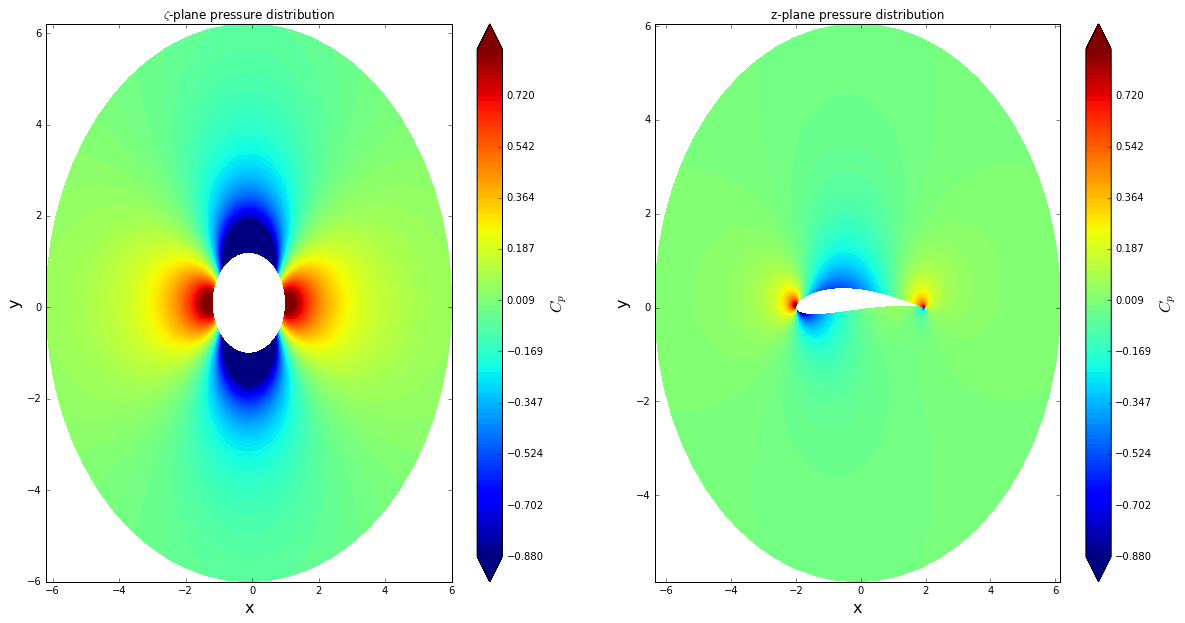

In [13]:
# Use this cell to write your code.

#in xi plane
cp_xi = 1 - ((U_xi**2+V_xi**2)/u_inf**2)

pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('$\zeta$-plane pressure distribution')
contf = pyplot.contourf(xi1.real, xi1.imag, cp_xi, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

# in z-plane
cp_z = 1 - (numpy.absolute(V_z)/u_inf)**2
pyplot.subplot(1,2,2)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('z-plane pressure distribution')
contf = pyplot.contourf(z1.real, z1.imag, cp_z, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)


In [45]:
idx_x,idx_y = numpy.where(V_z.real < 1e-10)

print("3.\tThe indices of the stagnation points are at [",idx_x[0],",",idx_y[0],"] and [",idx_x[1],",",idx_y[1],"]")

3.	The indices of the stagnation points are at [ 0 , 0 ] and [ 30 , 0 ]


4.) The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

Ans: The Karmann-Trefftz airfoil considered here has a tail angle of 5 degrees. Even though the angle of incidence of the freestream is zero, as there is no circulation in when only a doublet and a freestream is considered in the problem setup, the stagnation point shows up one grid point before the trailing egde.

---

### Kutta condition!

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Calculate the circulation needed to satisfy the Kutta condition (i.e. to bring the stagnation point to the trailing-edge).

2(a)- Write a function that returns the velocity field due to a vortex-point on a given mesh-grid.

2(b)- Write a function that returns the streamfunction due to a vortex-point on a given mesh-grid.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes.

5- Compute and plot filled contour of pressure coefficient in both planes.

6- What are the index of the stagnation points? Is it what you were expecting?

In [14]:
# Use this cell to write your functions.
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u,v

def get_streamfunction_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function of the vortex
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [15]:
# Use this cell to provide the rest of the code.

#strength of vortex
#since the trailing edge is one grid point away from the airfoil, the angle by which the stagnation point shifts is
alpha = -(THETA[2]-THETA[1])
strength_vortex = -strength_doublet*numpy.sin(2*alpha)/(R*numpy.cos(theta))
print("1.\tThe circulation needed to satisfy the Kutta condition is",strength_vortex)

1.	The circulation needed to satisfy the Kutta condition is 1.44841984981


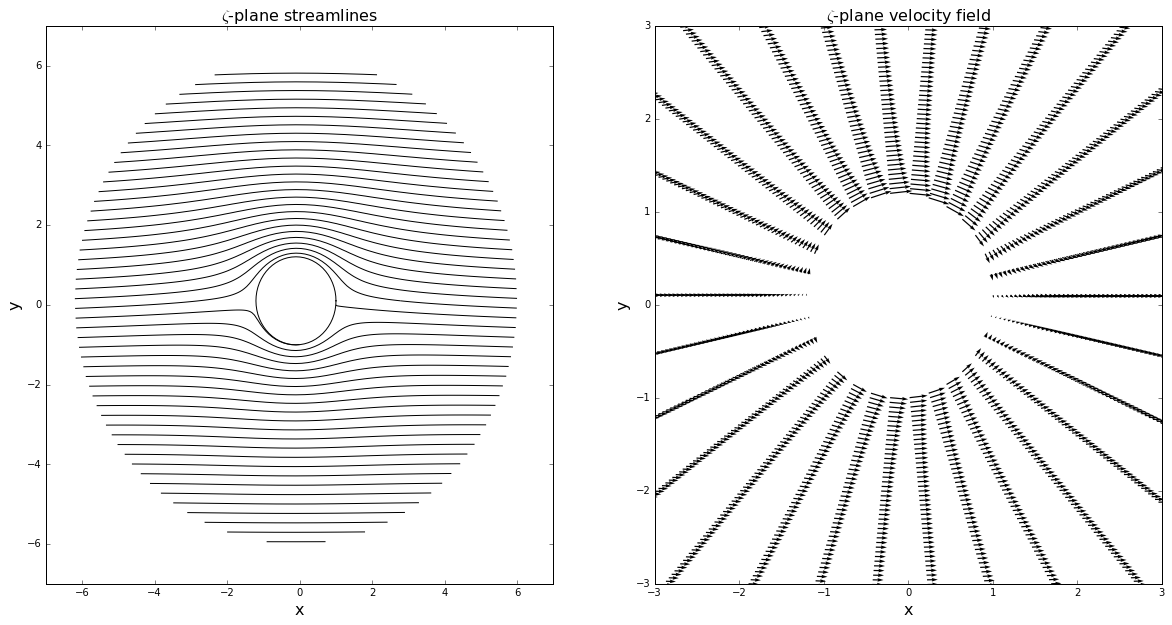

In [16]:
# including vortex in the system using superposition
x_vortex,y_vortex = 0.0,0.0
u_vortex,v_vortex = get_velocity_vortex(strength_vortex,x_vortex,y_vortex,xi1.real,xi1.imag)
psi_vortex = get_streamfunction_vortex(strength_vortex,x_vortex,y_vortex,xi1.real,xi1.imag)

U_xi_circulation = U_xi + u_vortex
V_xi_circulation = V_xi + v_vortex
psi_xi_circulation = psi_xi + psi_vortex

#plotting in xi-plane
pyplot.figure(figsize=(2*size,size))
pyplot.subplot(1,2,1)
pyplot.contour(xi1.real,xi1.imag,psi_xi_circulation,levels=numpy.linspace(numpy.min(psi_xi),numpy.max(psi_xi),51),colors = 'k',linestyles='solid')
pyplot.plot(xi1.real[:,0],xi1.imag[:,0],color='k')
pyplot.title('$\zeta$-plane streamlines',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-7,7);
pyplot.ylim(-7,7);

pyplot.subplot(1,2,2)
pyplot.quiver(xi1.real[::2],xi1.imag[::2],U_xi_circulation[::2],V_xi_circulation[::2],scale_units='inches',scale = 7)
pyplot.title('$\zeta$-plane velocity field',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);

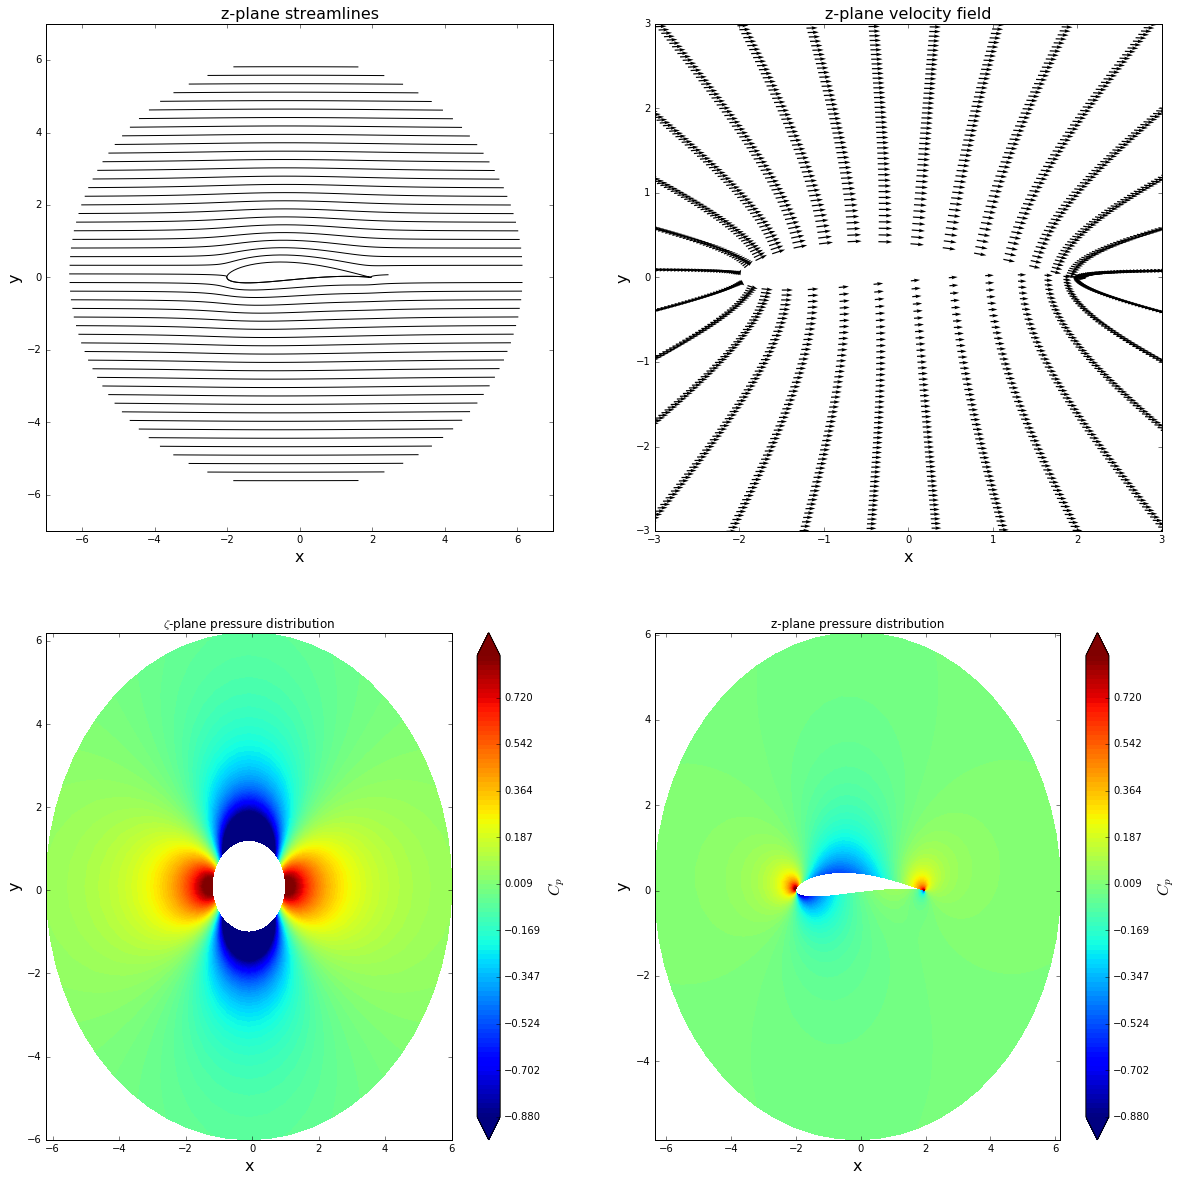

In [17]:
V_z_circulation = (U_xi_circulation - V_xi_circulation*1j)/dz

pyplot.figure(figsize=(2*size,2*size))
pyplot.subplot(2,2,1)
pyplot.contour(z1.real,z1.imag,psi_xi,levels=numpy.linspace(numpy.min(psi_xi),numpy.max(psi_xi),51),colors = 'k',linestyles='solid')
pyplot.plot(z1.real[:,0],z1.imag[:,0],color='k')
pyplot.title('z-plane streamlines',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-7,7);
pyplot.ylim(-7,7);

pyplot.subplot(2,2,2)
pyplot.quiver(z1.real[::2],z1.imag[::2],V_z_circulation.real[::2],-V_z_circulation.imag[::2],scale_units='inches',scale = 7.0)
pyplot.title('z-plane velocity field',fontsize = 16)
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);

# in xi plane
cp_xi_circulation = 1 - ((U_xi_circulation**2 + V_xi_circulation**2)/u_inf**2)

pyplot.subplot(2,2,3)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('$\zeta$-plane pressure distribution')
contf = pyplot.contourf(xi1.real, xi1.imag, cp_xi, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

# in z-plane
cp_z_circulation = 1 - (numpy.absolute(V_z_circulation)/u_inf)**2

pyplot.subplot(2,2,4)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('z-plane pressure distribution')
contf = pyplot.contourf(z1.real, z1.imag, cp_z, levels=numpy.linspace(-0.88,0.88,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)


6.) What are the index of the stagnation points? Is it what you were expecting?

Ans: The stagnation points are expected at the leading edge and the trailing edge of the airfoil. The stagnation points are at the indices [31,0] and [59,0]. With the circulation, the stagnation point shifting to the trailing edge was expected. However, the negative value for the horizontal component of velocity at the trailing edge was unexpected.

In [73]:
V_z_circulation[59,0]

(-0.67602189529251056+0.508813166731924j)

In [74]:
V_z_circulation[31,0]

(0.063806376544645479+0.04562687160558896j)

---

### What about the lift and drag?

The drag is defined as the force felt by the body in the direction of the freestream and the lift as the one normal to the freestream direction.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, calculate the lift in two manners:
* using the Kutta-Joukowski theorem,
* integrating the pressure along the surface of the cylinder.

2- Calculate the drag by integrating the pressure along the surface of the cylinder. What's the value? Is it what you were expecting? Why?

In [98]:
# Use this cell to provide the code.

# using Kutta-Joukowski Theorem
ro,p_inf = 1.0,0.0
lift = ro*strength_vortex*u_inf;
print("1.\tThe lift calcluated using Kutta Joukowski theorem is",lift)

# integrating the pressure along the surface of the cylinder
lift1 = -integrate.simps(0.5*u_inf**2*ro*cp_xi_circulation[1:,0]*R*numpy.sin(THETA[1:]),THETA[1:])
print("\tThe lift calculated by integration of pressure over the surface is",lift1)
print("\tThe lift obtained using the Kutta-Joukowski condition and by integration is almost equal.")

#drag
drag = -integrate.simps(0.5*u_inf**2*ro*cp_xi_circulation[1:,0]*R*numpy.cos(THETA[1:]),THETA[1:])
print("\n2.\tThe drag calculated by integration of pressure over the surface is",drag)
print("\tThe expected drag on the airfoil is zero due to the Potential Flow approximation.")
print("\tThis is due to D'Alembert's paradox")

1.	The lift calcluated using Kutta Joukowski theorem is 1.44841984981
	The lift calculated by integration of pressure over the surface is 1.43727828036
	The lift obtained using the Kutta-Joukowski condition and by integration is almost equal.

2.	The drag calculated by integration of pressure over the surface is 0.0536598074132
	The expected drag on the airfoil is zero due to the Potential Flow approximation.
	This is due to D'Alembert's paradox


The expected drag on the cylinder is zero due to D'Alemberts paradox.

---

## Second part - Sources and vortices

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we are going to provide you a set of points which represent the previously used Karman-Trefftz airfoil, as well as the source-strength and vortex-strength associated with each point.

Your task will be to load those data from a file, compute the velocity field generated by those singularities, and apply the principle of superposition.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^o$.

The file `airfoil_data_midterm.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, source-strenghts, and vortex-strengths).

You are problably wondering how we obtained those source-strenghts and vortex-strengths.
Well, they are the solution from a source-vortex panel method that we are going to program during the second part of the semester.

**List of tasks:**

1- Read the data from the file `airfoil_data_midterm.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You might want to set the keyword argument `unpack` to `True`.)

2- Create a $201 \times 201$ Cartesian mesh-grid that covers the domain $[-2.5, 2.5]\times[-2.5, 2.5]$.

3- Write a function to compute the velocity field due a source-point.

4- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=streamplot#matplotlib.pyplot.streamplot).

5- Compute the pressure coefficient on the mesh-grid and plot its filled contour. What are the coordinates of the maximum pressure coefficient?

6- Calculate the lift using the Kutta-Joukowski theorem. (Hint: the total circulation corresponds to the sum of all vortex strengths.)

In [19]:
# Write your function in this cell.
def get_velocity_source(strength, xs, ys, X, Y):
    """ 
    Returns the velocity field and stream function generated by a source or a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source/sink.
    ys: float
        y-coordinate of the source/sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

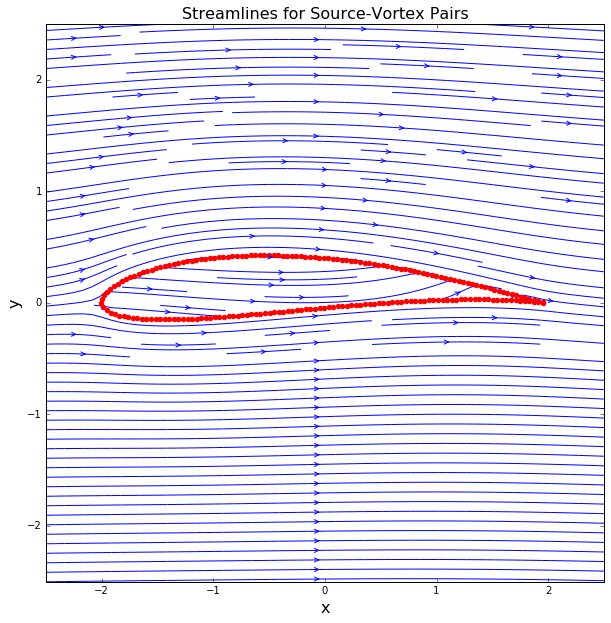

In [20]:
# Use this cell to provide the rest of the code.
[x_airfoil, y_airfoil, strength_source, strength_vortex1] = numpy.loadtxt("airfoil_data_midterm.txt",unpack=True)
xstart,xend,ystart,yend,Nx,Ny = -2.5,2.5,-2.5,2.5,201,201
x = numpy.linspace(xstart,xend,Nx)
y = numpy.linspace(ystart,yend,Ny)
X_airfoil,Y_airfoil = numpy.meshgrid(x,y)
U,V = u_inf,0.0
#calculating effect of vortex and source
for i in range(x_airfoil.size):
    u_source,v_source = get_velocity_source(strength_source[i],x_airfoil[i],y_airfoil[i],X_airfoil,Y_airfoil)
    u_vortex,v_vortex = get_velocity_vortex(strength_vortex1[i],x_airfoil[i],y_airfoil[i],X_airfoil,Y_airfoil)
    U = U + u_source + u_vortex
    V = V + v_source + v_vortex

pyplot.figure(figsize = (size,size))
#subplot
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.title('Streamlines for Source-Vortex Pairs',fontsize = 16)
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.streamplot(X_airfoil,Y_airfoil,U,V,density=2,linewidth=1,arrowstyle = '->',arrowsize = 1)
pyplot.scatter(x_airfoil,y_airfoil,color = 'red',s =20)

The co-ordinates of the point with maximum pressure coefficient is ( -2.025 , 0.0 )


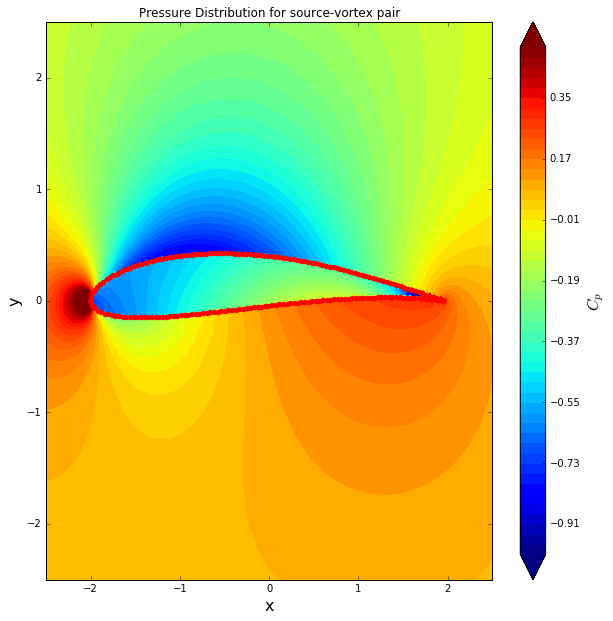

In [72]:
#co-efficient of pressure
cp = 1-((U**2+V**2)/u_inf)
cpmax_x_index,cpmax_y_index = numpy.where(cp == numpy.max(cp))
X_cp,Y_cp = X_airfoil[cpmax_x_index,cpmax_y_index],Y_airfoil[cpmax_x_index,cpmax_y_index]
print("The co-ordinates of the point with maximum pressure coefficient is (",X_cp[0],",",Y_cp[0],")")
#plotting
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.title('Pressure Distribution for source-vortex pair')
contf = pyplot.contourf(X_airfoil, Y_airfoil, cp,levels = numpy.linspace(-1,0.5,51), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
pyplot.scatter(x_airfoil,y_airfoil,color='red',s=20)

In [100]:
#lift using Kutta Joukowski condition
circulation = numpy.sum(strength_vortex1)
lift2 = circulation*ro*u_inf
print("The lift on the airfoil is",lift2)

The lift on the airfoil is 1.23768
